In [1]:
import warnings

In [2]:
pip install rarfile

# Dataset Loading


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [4]:
import requests
import io
import rarfile
import pandas as pd

# URL of the RAR file
rar_file_url = 'https://github.com/harshal-96/Data/raw/main/credit_data.rar'

# Download the RAR file content
response = requests.get(rar_file_url)

# Check if the request was successful
if response.status_code == 200:
    # Open the RAR file from the downloaded content
    with rarfile.RarFile(io.BytesIO(response.content)) as rar_ref:
        # Name of the CSV file within the RAR file
        csv_file_name = 'credit_data.csv'

        # Check if the CSV file exists in the RAR archive
        if csv_file_name in rar_ref.namelist():
            # Read the CSV file directly into a pandas DataFrame
            with rar_ref.open(csv_file_name) as csv_file:
                df = pd.read_csv(csv_file)
            # Display the DataFrame
            print(df)
        else:
            print(f"CSV file '{csv_file_name}' not found in the RAR archive.")
else:
    print("Failed to download the RAR file.")

        Age  Gender  Income  Credit Score  Credit History Length  \
0        31    Male   36000           604                    487   
1        25    Male   50000           447                    386   
2        62   Other  178000           850                    503   
3        69  Female   46000           668                    349   
4        52    Male  132000           601                    553   
...     ...     ...     ...           ...                    ...   
279851   69    Male   61000           495                    565   
279852   45  Female  124000           850                    476   
279853   33  Female   71000           582                    560   
279854   67    Male  191000           411                    481   
279855   33   Other   18000           474                    374   

        Number of Existing Loans  Loan Amount  Loan Tenure Existing Customer  \
0                              5       109373          221                No   
1                      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Gender                    279856 non-null  object 
 2   Income                    279856 non-null  int64  
 3   Credit Score              279856 non-null  int64  
 4   Credit History Length     279856 non-null  int64  
 5   Number of Existing Loans  279856 non-null  int64  
 6   Loan Amount               279856 non-null  int64  
 7   Loan Tenure               279856 non-null  int64  
 8   Existing Customer         279856 non-null  object 
 9   State                     279856 non-null  object 
 10  City                      279856 non-null  object 
 11  LTV Ratio                 279856 non-null  float64
 12  Employment Profile        279856 non-null  object 
 13  Profile Score             279856 non-null  i

In [6]:
df

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279851,69,Male,61000,495,565,3,150000,14,No,Tamil Nadu,Chennai,90.300189,Salaried,71,Software Engineer
279852,45,Female,124000,850,476,10,80341,86,Yes,Karnataka,Bengaluru,78.960607,Salaried,91,Civil Servant
279853,33,Female,71000,582,560,5,39851,101,No,Karnataka,Mysuru,95.000000,Unemployed,57,NaN
279854,67,Male,191000,411,481,2,150000,111,No,Delhi,New Delhi,56.109002,Salaried,69,Software Engineer


In [7]:
df.columns

Index(['Age', 'Gender', 'Income', 'Credit Score', 'Credit History Length',
       'Number of Existing Loans', 'Loan Amount', 'Loan Tenure',
       'Existing Customer', 'State', 'City', 'LTV Ratio', 'Employment Profile',
       'Profile Score', 'Occupation'],
      dtype='object')

# Data Cleaning

In [8]:
df.isna().sum()

Age                             0
Gender                          0
Income                          0
Credit Score                    0
Credit History Length           0
Number of Existing Loans        0
Loan Amount                     0
Loan Tenure                     0
Existing Customer               0
State                           0
City                            0
LTV Ratio                       0
Employment Profile              0
Profile Score                   0
Occupation                  18272
dtype: int64

In [9]:
df[df['Occupation'].isna()]

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
25,61,Female,41000,307,104,0,23296,99,No,Rajasthan,Udaipur,58.686622,Unemployed,23,NaN
28,52,Female,87000,697,26,7,141231,70,Yes,Delhi,New Delhi,94.616809,Unemployed,58,NaN
31,57,Female,130000,850,600,10,56891,195,Yes,Telangana,Hyderabad,40.481983,Unemployed,96,NaN
33,53,Male,33000,428,576,2,99179,56,No,Delhi,New Delhi,53.836170,Unemployed,62,NaN
41,18,Other,16000,329,436,0,12592,119,No,Telangana,Hyderabad,94.802565,Unemployed,17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279777,24,Female,67000,374,238,1,120860,81,No,Karnataka,Mysuru,52.352218,Unemployed,52,NaN
279792,24,Female,51000,514,549,3,150000,69,No,West Bengal,Kolkata,54.303719,Unemployed,80,NaN
279806,39,Male,22000,683,262,6,51961,261,Yes,West Bengal,Kolkata,93.614738,Unemployed,84,NaN
279825,70,Male,41000,626,151,5,139038,300,No,Telangana,Channarayapatna,53.113861,Unemployed,99,NaN


In [10]:
df.loc[df['Employment Profile'] == 'Unemployed', 'Occupation'] = 'Unoccupied'

In [11]:
df.columns

Index(['Age', 'Gender', 'Income', 'Credit Score', 'Credit History Length',
       'Number of Existing Loans', 'Loan Amount', 'Loan Tenure',
       'Existing Customer', 'State', 'City', 'LTV Ratio', 'Employment Profile',
       'Profile Score', 'Occupation'],
      dtype='object')

# Correlation Analysis

In [12]:
numeric_columns=['Age', 'Income', 'Credit Score', 'Credit History Length',
       'Number of Existing Loans', 'Loan Amount', 'Loan Tenure',
      'LTV Ratio',
       'Profile Score']

In [13]:
numeric_df=df[numeric_columns]

In [14]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Income                    279856 non-null  int64  
 2   Credit Score              279856 non-null  int64  
 3   Credit History Length     279856 non-null  int64  
 4   Number of Existing Loans  279856 non-null  int64  
 5   Loan Amount               279856 non-null  int64  
 6   Loan Tenure               279856 non-null  int64  
 7   LTV Ratio                 279856 non-null  float64
 8   Profile Score             279856 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 19.2 MB


<Axes: >

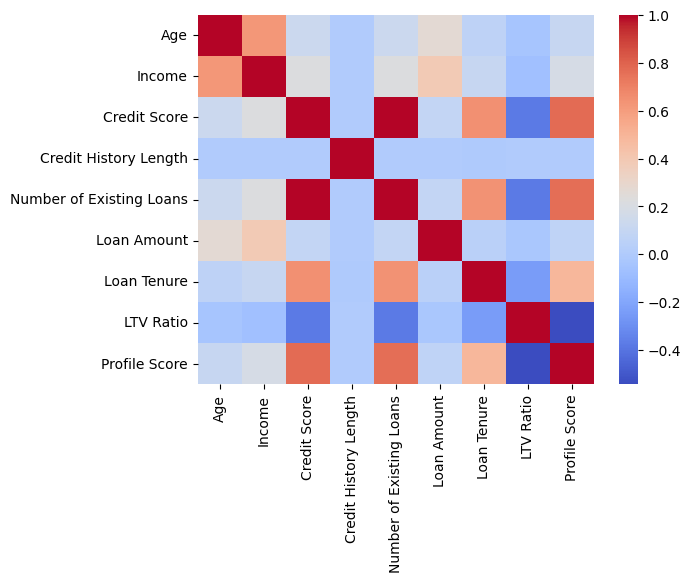

In [15]:
sns.heatmap(numeric_df.corr(), cmap='coolwarm')

In [16]:
numeric_df=numeric_df.drop(columns='Credit Score')

<Axes: >

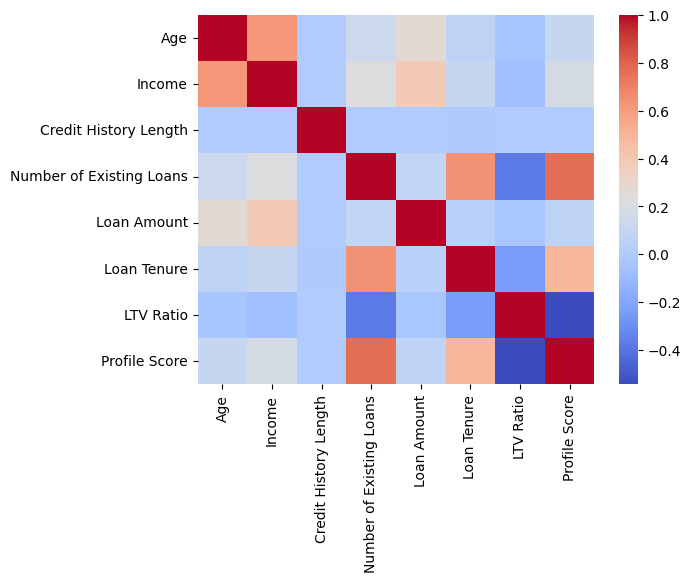

In [17]:
sns.heatmap(numeric_df.corr(), cmap='coolwarm')

<Axes: xlabel='Number of Existing Loans', ylabel='Credit Score'>

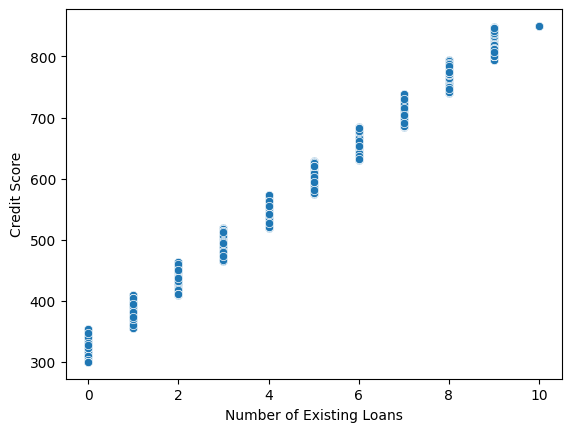

In [18]:
sns.scatterplot(x='Number of Existing Loans',y='Credit Score',data=df)

In [19]:
numeric_df.corr()

,Age,Income,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score
Age,1.000000,0.622863,0.001537,0.127130,0.267733,0.063170,-0.042057,0.105179
Income,0.622863,1.000000,0.002024,0.219696,0.387740,0.107712,-0.071813,0.183049
Credit History Length,0.001537,0.002024,1.000000,0.001956,0.001706,-0.003422,0.000634,0.000196
Number of Existing Loans,0.127130,0.219696,0.001956,1.000000,0.084099,0.641751,-0.379108,0.764553
Loan Amount,0.267733,0.387740,0.001706,0.084099,1.000000,0.046451,-0.030152,0.069251
Loan Tenure,0.063170,0.107712,-0.003422,0.641751,0.046451,1.000000,-0.245070,0.492360
LTV Ratio,-0.042057,-0.071813,0.000634,-0.379108,-0.030152,-0.245070,1.000000,-0.543223
Profile Score,0.105179,0.183049,0.000196,0.764553,0.069251,0.492360,-0.543223,1.000000


# Hypothesis Testing

Testing difference in Income between different ages

In [20]:
from scipy.stats import pearsonr

# Testing difference in Income between different ages
correlation, p_value = pearsonr(df['Age'], df['Income'])
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")


Pearson correlation coefficient: 0.6228627644989794
P-value: 0.0


Testing difference in Existing Customer between males and females

In [21]:
from scipy.stats import chi2_contingency

# Testing difference in Existing Customer between males and females

contingency_table = pd.crosstab(df['Gender'], df['Existing Customer'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")


Chi-square statistic: 2.375210414965913
P-value: 0.30495068392942726


How are the male and female scores being compared ?

In [22]:
from scipy.stats import ttest_ind

# Testing difference in Profile Score between males and females
male_scores = df[df['Gender'] == 'Male']['Profile Score']
female_scores = df[df['Gender'] == 'Female']['Profile Score']
t_statistic, p_value = ttest_ind(male_scores, female_scores)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: -2.5392084555706753
P-value: 0.011110924947369424


How are the different groups of states defined and why is a one-way ANOVA used here?

In [23]:
from scipy.stats import f_oneway

# Testing difference in Profile Score among different states
state_groups = [df[df['State'] == state]['Profile Score'] for state in df['State'].unique()]
f_statistic, p_value = f_oneway(*state_groups)
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 2.5608055830846514
P-value: 0.0060925276581773845


In [24]:
df['State'].unique()

array(['Karnataka', 'Uttar Pradesh', 'Tamil Nadu', 'West Bengal',
       'Rajasthan', 'Maharashtra', 'Gujarat', 'Telangana', 'Kerala',
       'Delhi'], dtype=object)

How are the states related and what insights can be drawn from the results?

In [25]:
# Testing difference in Profile Score among different states

group1_states = ['Karnataka', 'Telangana', 'Kerala','Tamil Nadu']
group2_states = ['Gujarat', 'West Bengal', 'Maharashtra']
group3_states = ['Uttar Pradesh', 'Rajasthan', 'Delhi']

group1 = df[df['State'].isin(group1_states)]['Profile Score']
group2 = df[df['State'].isin(group2_states)]['Profile Score']
group3 = df[df['State'].isin(group3_states)]['Profile Score']
f_statistic, p_value = f_oneway(group1, group2, group3)

In [26]:
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 3.34294195263925
P-value: 0.03533426802441087


How are gender and profile score related ?

In [27]:
contingency_table = pd.crosstab(df['Gender'], df['Profile Score'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-square statistic: 212.66976190988368
P-value: 0.25663526707898543


How are Age and Profile Score correlated ?

In [28]:
correlation, p_value = pearsonr(df['Age'], df['Profile Score'])
print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

Correlation: 0.10517945147645097
P-value: 0.0


# Outlier Detection and Removal

<Axes: ylabel='Profile Score'>

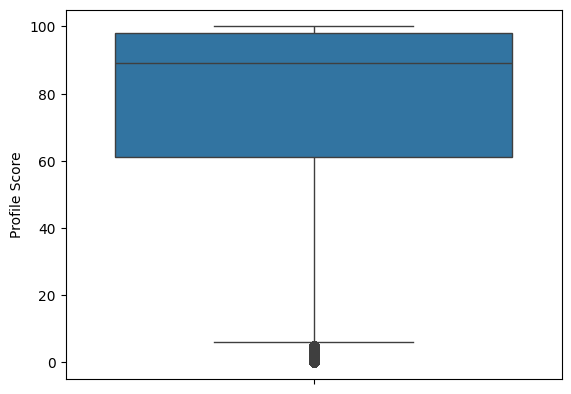

In [29]:
sns.boxplot(df['Profile Score'])

In [30]:
q1=np.percentile(df['Profile Score'],25)
q3=np.percentile(df['Profile Score'],75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul,ll

(153.5, 5.5)

In [31]:
df[df['Profile Score']<5.5].shape

(1670, 15)

In [32]:
df[df['Profile Score']<5.5]

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
116,69,Female,51000,311,196,0,59282,43,No,Maharashtra,Mumbai,95.000000,Self-Employed,0,Farmer
127,28,Female,28000,300,74,0,76802,64,No,West Bengal,Kolkata,95.000000,Student,0,Student
445,23,Male,58000,300,336,0,123590,19,No,Delhi,New Delhi,95.000000,Self-Employed,2,Shopkeeper
548,59,Male,29000,373,205,1,73193,104,No,Karnataka,Mysuru,95.000000,Unemployed,0,Unoccupied
739,39,Male,42000,300,264,0,124406,71,No,Kerala,Thiruvananthapuram,90.946626,Student,0,Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279051,32,Male,36000,307,127,0,144490,66,No,Telangana,Hyderabad,95.000000,Freelancer,4,Photographer
279073,31,Female,36000,300,471,0,88856,83,No,Delhi,New Delhi,95.000000,Freelancer,0,Independent Consultant
279074,31,Female,69000,300,508,0,89140,102,No,West Bengal,Kolkata,95.000000,Unemployed,1,Unoccupied
279667,27,Male,35000,391,452,1,44261,52,No,Karnataka,Mysuru,95.000000,Student,3,Student


In [33]:
df.loc[df['Profile Score'] < 5.5, 'Profile Score'] = 6

<Axes: ylabel='Profile Score'>

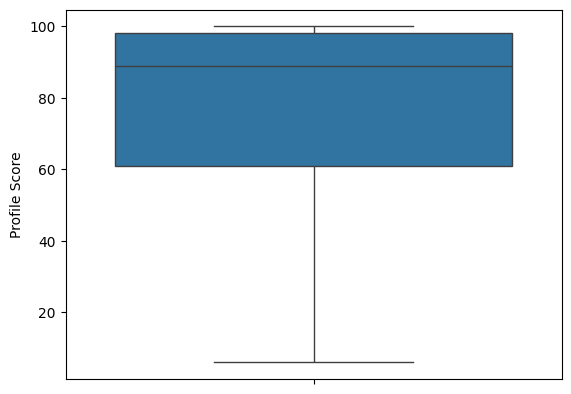

In [34]:
sns.boxplot(df['Profile Score'])

<Axes: ylabel='Loan Amount'>

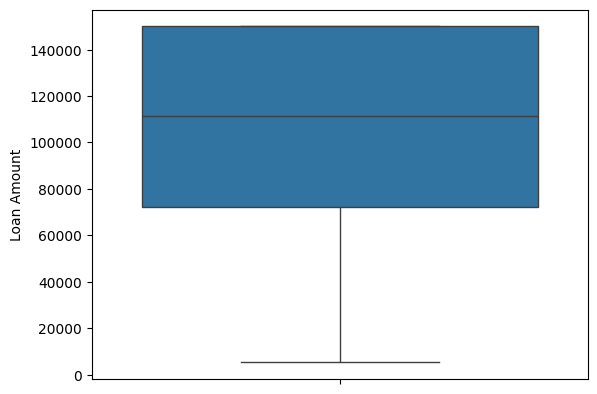

In [35]:
sns.boxplot(df['Loan Amount'])

<Axes: ylabel='Income'>

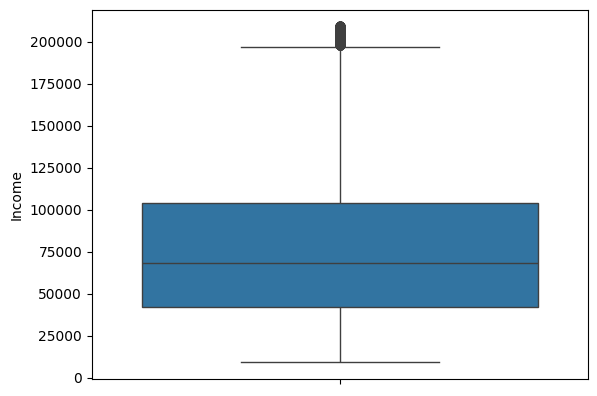

In [36]:
sns.boxplot(df['Income'])

In [37]:
q1=np.percentile(df['Income'],25)
q3=np.percentile(df['Income'],75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul,ll

(197000.0, -51000.0)

In [38]:
df['Income'].describe()

count    279856.000000
mean      76499.163856
std       42875.575193
min        9000.000000
25%       42000.000000
50%       68000.000000
75%      104000.000000
max      209000.000000
Name: Income, dtype: float64

In [39]:
df.loc[df['Income'] > 197000.0, 'Income'] = 196000

In [40]:
df

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279851,69,Male,61000,495,565,3,150000,14,No,Tamil Nadu,Chennai,90.300189,Salaried,71,Software Engineer
279852,45,Female,124000,850,476,10,80341,86,Yes,Karnataka,Bengaluru,78.960607,Salaried,91,Civil Servant
279853,33,Female,71000,582,560,5,39851,101,No,Karnataka,Mysuru,95.000000,Unemployed,57,Unoccupied
279854,67,Male,191000,411,481,2,150000,111,No,Delhi,New Delhi,56.109002,Salaried,69,Software Engineer


<Axes: ylabel='Income'>

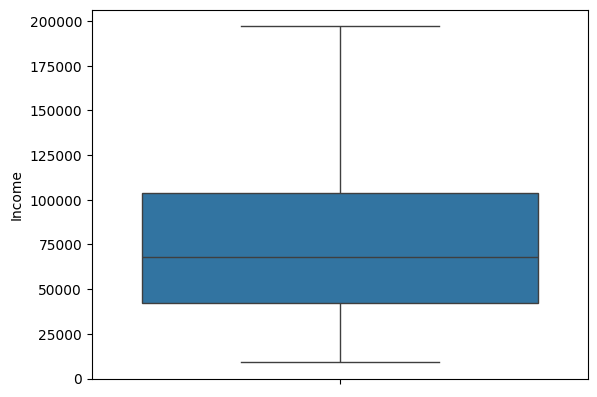

In [41]:
sns.boxplot(df['Income'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Gender                    279856 non-null  object 
 2   Income                    279856 non-null  int64  
 3   Credit Score              279856 non-null  int64  
 4   Credit History Length     279856 non-null  int64  
 5   Number of Existing Loans  279856 non-null  int64  
 6   Loan Amount               279856 non-null  int64  
 7   Loan Tenure               279856 non-null  int64  
 8   Existing Customer         279856 non-null  object 
 9   State                     279856 non-null  object 
 10  City                      279856 non-null  object 
 11  LTV Ratio                 279856 non-null  float64
 12  Employment Profile        279856 non-null  object 
 13  Profile Score             279856 non-null  i

<Axes: ylabel='Loan Amount'>

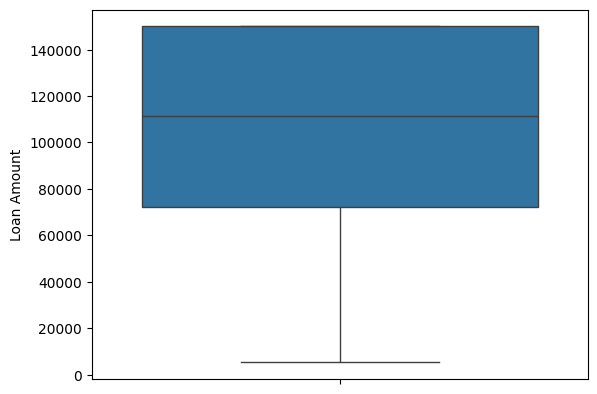

In [43]:
sns.boxplot(df['Loan Amount'])

In [44]:
df.describe()

,Age,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score
count,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000,279856.000000
mean,44.005217,76480.286290,582.953773,307.965146,4.701693,105795.342773,133.340654,71.643101,77.376683
std,15.311051,42821.231618,163.076754,175.083268,2.980351,40458.370929,96.064132,16.865785,24.429000
min,18.000000,9000.000000,300.000000,6.000000,0.000000,5294.000000,12.000000,40.000000,6.000000
25%,31.000000,42000.000000,446.000000,156.000000,2.000000,72173.000000,62.000000,58.105848,61.000000
50%,44.000000,68000.000000,584.000000,307.000000,5.000000,111263.000000,100.000000,72.133017,89.000000
75%,57.000000,104000.000000,722.000000,460.000000,7.000000,150000.000000,201.000000,86.239725,98.000000
max,70.000000,197000.000000,850.000000,611.000000,10.000000,150000.000000,359.000000,95.000000,100.000000


In [45]:
df=df.drop(columns='Credit Score')

# Feature Engineering

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['Gender', 'Existing Customer', 'State', 'City', 'Employment Profile', 'Occupation']

encoder = OneHotEncoder(drop='first', sparse=False)

encoded_data = encoder.fit_transform(df[categorical_columns])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

final_df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)


In [ ]:
final_df

,Age,Income,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score,Gender_Male,Gender_Other,...,Occupation_Farmer,Occupation_Graphic Designer,Occupation_Independent Consultant,Occupation_Photographer,Occupation_Shopkeeper,Occupation_Software Engineer,Occupation_Student,Occupation_Teacher,Occupation_Unoccupied,Occupation_Writer
0,31,36000,487,5,109373,221,90.943430,77,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25,50000,386,2,150000,89,91.135253,43,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,62,178000,503,10,69099,110,40.000000,90,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,69,46000,349,6,150000,148,87.393365,86,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52,132000,553,5,150000,157,66.158757,90,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279851,69,61000,565,3,150000,14,90.300189,71,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
279852,45,124000,476,10,80341,86,78.960607,91,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279853,33,71000,560,5,39851,101,95.000000,57,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
279854,67,191000,481,2,150000,111,56.109002,69,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<Axes: ylabel='LTV Ratio'>

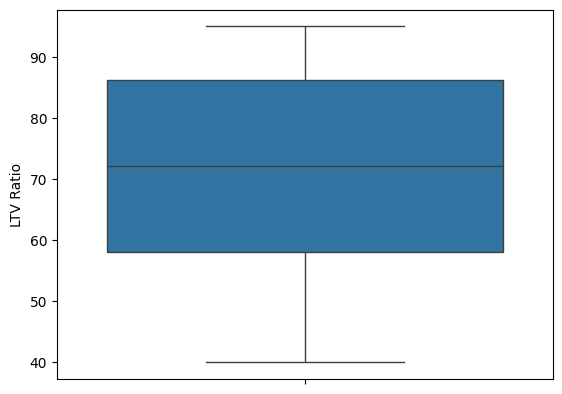

In [ ]:
sns.boxplot(df['LTV Ratio'])

In [ ]:
final_df1=final_df.copy()

In [ ]:
df.columns

Index(['Age', 'Gender', 'Income', 'Credit History Length',
       'Number of Existing Loans', 'Loan Amount', 'Loan Tenure',
       'Existing Customer', 'State', 'City', 'LTV Ratio', 'Employment Profile',
       'Profile Score', 'Occupation'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Income', 'Loan Amount','LTV Ratio','Number of Existing Loans']

scaler = MinMaxScaler()

final_df1[columns_to_scale] = scaler.fit_transform(final_df1[columns_to_scale])

In [ ]:
final_df1

,Age,Income,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score,Gender_Male,Gender_Other,...,Occupation_Farmer,Occupation_Graphic Designer,Occupation_Independent Consultant,Occupation_Photographer,Occupation_Shopkeeper,Occupation_Software Engineer,Occupation_Student,Occupation_Teacher,Occupation_Unoccupied,Occupation_Writer
0,31,0.143617,487,0.5,0.719245,221,0.926244,77,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25,0.218085,386,0.2,1.000000,89,0.929732,43,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,62,0.898936,503,1.0,0.440929,110,0.000000,90,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,69,0.196809,349,0.6,1.000000,148,0.861698,86,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52,0.654255,553,0.5,1.000000,157,0.475614,90,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279851,69,0.276596,565,0.3,1.000000,14,0.914549,71,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
279852,45,0.611702,476,1.0,0.518617,86,0.708375,91,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279853,33,0.329787,560,0.5,0.238808,101,1.000000,57,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
279854,67,0.968085,481,0.2,1.000000,111,0.292891,69,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Train Test and Val data split

In [ ]:
X=final_df1.drop('Profile Score', axis=1)

In [ ]:
y=final_df1['Profile Score']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

# K-fold Cross validation

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

models = []
names = ['Random Forest','DecisionTreeRegressor','Adaboost','Xgboost']

models.append(RandomForestRegressor(n_estimators=100))
models.append(DecisionTreeRegressor())
models.append(AdaBoostRegressor())
models.append(xgb.XGBRegressor())

In [ ]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

kfold = KFold(n_splits=5)

for i in range(len(models)):
    cv_mae = cross_val_predict(models[i], X_train, y_train, cv=kfold)
    mae = mean_absolute_error(y_train, cv_mae)
    mse = mean_squared_error(y_train, cv_mae)
    rmse = mean_squared_error(y_train, cv_mae, squared=False)
    r2 = r2_score(y_train, cv_mae)

    print(f"{names[i]} Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2) Score: {r2}")
    print()

Random Forest Metrics:
Mean Absolute Error (MAE): 3.6132147822251506
Mean Squared Error (MSE): 31.15030140530521
Root Mean Squared Error (RMSE): 5.581245506632476
R-squared (R2) Score: 0.9477064913534237

DecisionTreeRegressor Metrics:
Mean Absolute Error (MAE): 2.6567135846170165
Mean Squared Error (MSE): 46.64131496814753
Root Mean Squared Error (RMSE): 6.829444704230903
R-squared (R2) Score: 0.9217009820919704

Adaboost Metrics:
Mean Absolute Error (MAE): 9.093885817155487
Mean Squared Error (MSE): 115.51780607315685
Root Mean Squared Error (RMSE): 10.747921011672762
R-squared (R2) Score: 0.8060747049564234

Xgboost Metrics:
Mean Absolute Error (MAE): 6.628514520733562
Mean Squared Error (MSE): 73.18607527574851
Root Mean Squared Error (RMSE): 8.55488604691778
R-squared (R2) Score: 0.8771390167162384



# Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

params = {
    'n_estimators': 100,
    'max_depth': None,  # Adjusted from 20
    'min_samples_split': 5,  # Adjusted from 2
    'min_samples_leaf': 1,  # Adjusted from 1
    'max_features': 'auto'
}


rf_regressor = RandomForestRegressor(**params)


rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 23.868319196578394


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 3.164183011832264
Mean Squared Error: 23.868319196578394
Root Mean Squared Error: 4.8855213843128755
R-squared: 0.9598606047264465


# Feature Importance Analysis

In [ ]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rf_regressor.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index().head(10)


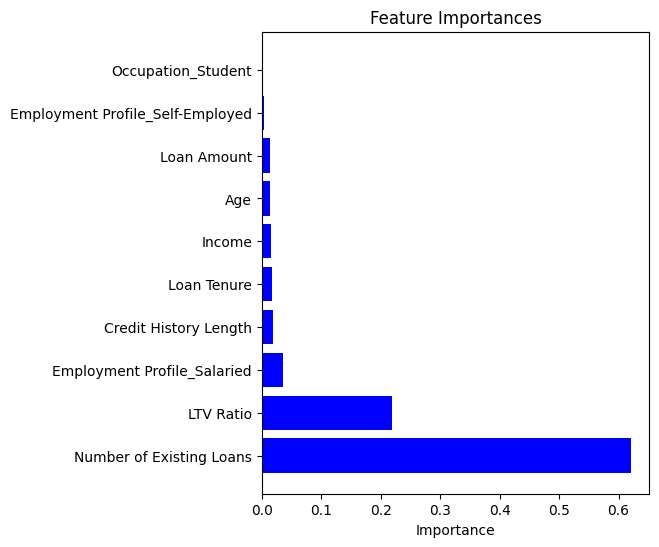

In [ ]:
plt.figure(figsize=(5, 6))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [ ]:
feature_importances.sort_values(by='importance',ascending=False).head(10)

,index,features,importance
9,45,Occupation_Business Owner,0.000585
8,32,City_Mumbai,0.000577
7,34,City_Nagpur,0.000571
6,37,City_Pune,0.000545
5,9,Existing Customer_Yes,0.000537
4,51,Occupation_Independent Consultant,0.000468
3,52,Occupation_Photographer,0.000451
2,58,Occupation_Writer,0.000446
1,50,Occupation_Graphic Designer,0.000442
0,8,Gender_Other,0.000334


In [ ]:
feature_importances.head(10)

,index,features,importance
0,3,Number of Existing Loans,0.620801
1,6,LTV Ratio,0.218740
2,41,Employment Profile_Salaried,0.035626
3,2,Credit History Length,0.018769
4,5,Loan Tenure,0.017472
5,1,Income,0.016032
6,0,Age,0.014481
7,4,Loan Amount,0.014088
8,42,Employment Profile_Self-Employed,0.002981
9,55,Occupation_Student,0.001793


# Pickle model and pipeline

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df1=df.copy()

In [ ]:
df1

,Age,Gender,Income,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279851,69,Male,61000,565,3,150000,14,No,Tamil Nadu,Chennai,90.300189,Salaried,71,Software Engineer
279852,45,Female,124000,476,10,80341,86,Yes,Karnataka,Bengaluru,78.960607,Salaried,91,Civil Servant
279853,33,Female,71000,560,5,39851,101,No,Karnataka,Mysuru,95.000000,Unemployed,57,Unoccupied
279854,67,Male,191000,481,2,150000,111,No,Delhi,New Delhi,56.109002,Salaried,69,Software Engineer


In [ ]:
X1=df1.drop('Profile Score', axis=1)

In [ ]:
y1=df1['Profile Score']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
# Define numerical and categorical features
numerical_features = ['Age', 'Credit History Length', 'Number of Existing Loans', 'Loan Amount', 'Loan Tenure', 'LTV Ratio']
categorical_features = ['Gender', 'State', 'City', 'Employment Profile', 'Occupation']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Encode categorical features
    ])

params = {
    'n_estimators': 100,
    'max_depth': None,  # Adjusted from 20
    'min_samples_split': 5,  # Adjusted from 2
    'min_samples_leaf': 1,  # Adjusted from 1
    'max_features': 'auto'
}

rf_regressor = RandomForestRegressor(**params)

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf_regressor', rf_regressor)
])

# Fit the pipeline to training data
pipeline.fit(X1_train, y1_train)

# Make predictions on test data
y1_pred = pipeline.predict(X1_test)

# Evaluate the model
print('R2 score:', r2_score(y1_test, y1_pred))
print('MAE:', mean_absolute_error(y1_test, y1_pred))

R2 score: 0.9752811432032972
MAE: 2.4563622282773654


In [ ]:
import pickle

pickle.dump(df1,open('df.pkl','wb'))
pickle.dump(pipeline,open('pipeline.pkl','wb'))

In [46]:
df

,Age,Gender,Income,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279851,69,Male,61000,565,3,150000,14,No,Tamil Nadu,Chennai,90.300189,Salaried,71,Software Engineer
279852,45,Female,124000,476,10,80341,86,Yes,Karnataka,Bengaluru,78.960607,Salaried,91,Civil Servant
279853,33,Female,71000,560,5,39851,101,No,Karnataka,Mysuru,95.000000,Unemployed,57,Unoccupied
279854,67,Male,191000,481,2,150000,111,No,Delhi,New Delhi,56.109002,Salaried,69,Software Engineer
